# Random Forest for Loan Approval

Preksha


This the a random forest classifer! Code taken from lesson and demo work and workshopped for this problem

In [54]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [39]:
df = pd.read_csv('loan_approval_dataset.csv') # we need to use this because we need drop+first = false
# Clean column names and target labels
df.columns = df.columns.str.strip()
print(df.shape)
df.head(3)


(4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected


In [40]:
train,test = train_test_split(df, train_size=0.8, random_state=1)

In [41]:
X_train = train.drop('loan_status', axis=1)
y_train = train['loan_status']

X_train_num = X_train.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(exclude='number')


# # Scale numeric
# from sklearn.preprocessing import StandardScaler
# stnd = StandardScaler().set_output(transform='pandas')
# X_train_num = stnd.fit_transform(X_train_num)

X_train_cat = pd.get_dummies(X_train_cat, drop_first=False)

X_train = pd.concat([X_train_num, X_train_cat], axis=1)

# Preview
X_train.head(3)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
913,914,0,7500000,27300000,20,553,11600000,2800000,26200000,6100000,True,False,True,False
338,339,3,6800000,16900000,18,628,3600000,900000,15600000,4900000,False,True,False,True
1784,1785,3,7900000,28000000,4,394,22800000,13200000,18200000,3900000,False,True,True,False


In [44]:
# standardize the test set
X_test = test.drop('loan_status', axis=1)
y_test = test.loan_status

X_test_num = X_test.select_dtypes(include='number')
X_test_cat = X_test.select_dtypes(exclude='number')

X_test_cat = pd.get_dummies(X_test_cat, drop_first=False)

# X_test_num = stnd.transform(X_test_num)

X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [50]:
rfc = RandomForestClassifier(n_estimators=2, max_depth=3) #default is to use sqrt
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9625292740046838

In [51]:
features_importance = pd.Series(rfc.feature_importances_,index=X_train.columns)
features_importance.sort_values(ascending=False)

cibil_score                 0.493755
loan_term                   0.342041
loan_amount                 0.085756
no_of_dependents            0.053945
loan_id                     0.019740
luxury_assets_value         0.003756
residential_assets_value    0.001009
income_annum                0.000000
commercial_assets_value     0.000000
bank_asset_value            0.000000
education_ Graduate         0.000000
education_ Not Graduate     0.000000
self_employed_ No           0.000000
self_employed_ Yes          0.000000
dtype: float64

<Axes: >

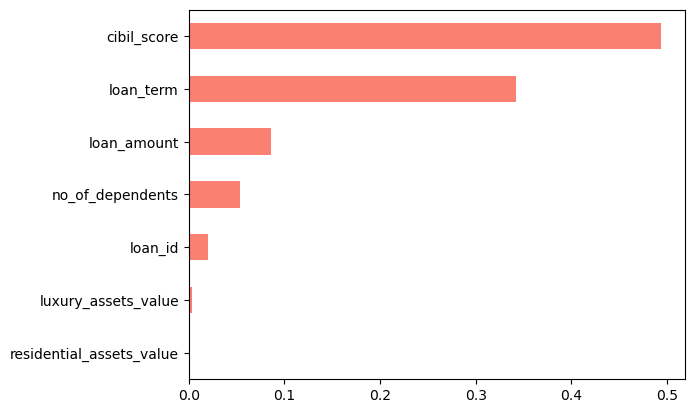

In [52]:
non_zero_importances = features_importance[features_importance > 0]

# Plot with horizontal bar chart
non_zero_importances.sort_values().plot.barh(color='salmon')

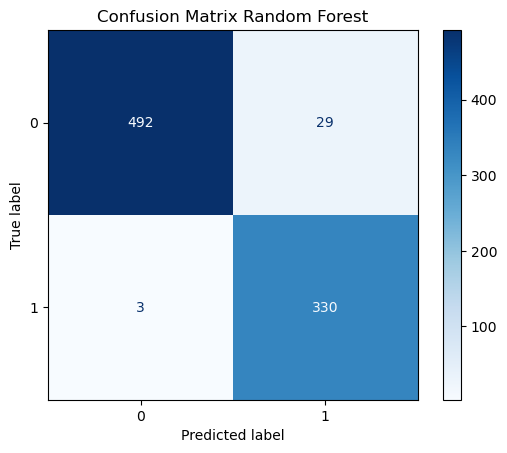

In [57]:
cm= confusion_matrix(y_test, rfc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Random Forest")
plt.show()

In [58]:
confusion_matrix?

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If